# Linear regression

In [546]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Linear regression with one variable

We will not implement linear regression with one variable to predict profits from a food truck. We are going to predict profits for new outlets based on already operating food trucks. The data we have are food trucks profits and populations of the cities they operate in. Our goal is to use this data to select which city to expand to next.

The `ex1data1.txt` dataset contains two columns. The first one is the population of a city and the second is the profit of the foodtruck located in this city. Based on that we want to build a linear regression model predicting the profit for given population.

## 1.1 Data wrangling

Let's start by loading out dataset.

In [547]:
data = np.loadtxt("datasets/ex1data1.txt", delimiter=",")

Let's now see the data we have.

In [548]:
data

array([[  6.1101 ,  17.592  ],
       [  5.5277 ,   9.1302 ],
       [  8.5186 ,  13.662  ],
       [  7.0032 ,  11.854  ],
       [  5.8598 ,   6.8233 ],
       [  8.3829 ,  11.886  ],
       [  7.4764 ,   4.3483 ],
       [  8.5781 ,  12.     ],
       [  6.4862 ,   6.5987 ],
       [  5.0546 ,   3.8166 ],
       [  5.7107 ,   3.2522 ],
       [ 14.164  ,  15.505  ],
       [  5.734  ,   3.1551 ],
       [  8.4084 ,   7.2258 ],
       [  5.6407 ,   0.71618],
       [  5.3794 ,   3.5129 ],
       [  6.3654 ,   5.3048 ],
       [  5.1301 ,   0.56077],
       [  6.4296 ,   3.6518 ],
       [  7.0708 ,   5.3893 ],
       [  6.1891 ,   3.1386 ],
       [ 20.27   ,  21.767  ],
       [  5.4901 ,   4.263  ],
       [  6.3261 ,   5.1875 ],
       [  5.5649 ,   3.0825 ],
       [ 18.945  ,  22.638  ],
       [ 12.828  ,  13.501  ],
       [ 10.957  ,   7.0467 ],
       [ 13.176  ,  14.692  ],
       [ 22.203  ,  24.147  ],
       [  5.2524 ,  -1.22   ],
       [  6.5894 ,   5.9966 ],
       [

In [549]:
# Add a column of ones to X.
X = np.array([np.ones(len(data[:, 0])), data[:, 0]]).T
# Prepare target value data.
y = data[:, 1]

Data type is numerical and we have no missing values on any other data related problems so we are ready to move on to exploration.

## 1.2 Data exploration

Let's create a scatter plot of these two variables.

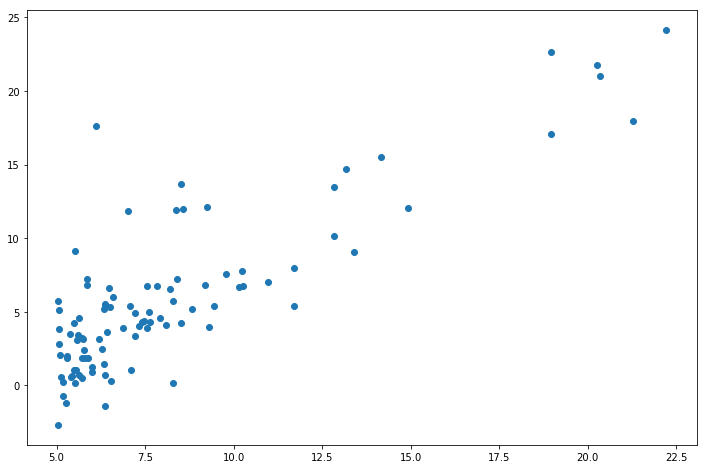

In [550]:
fig, axes = plt.subplots(figsize=(12, 8))
axes = plt.scatter(data[:,0], data[:, 1])
# axes.set_xlabel("Population of city in 10,000s")
# axes.set_ylabel("Profit in $10,000s")
# axes.set_title("Population vs. Profit")

We can see that there is clear linear relationship between city population and food truck profits. Let's measure it using correlation coefficient.

In [551]:
np.corrcoef(data[:, 0], data[:, 1])

array([[ 1.        ,  0.83787323],
       [ 0.83787323,  1.        ]])

The correlation is really strong.

## 1.3 Gradient descent

In [552]:
# Initial theta params values.
theta = np.zeros((2, 1))

# Gradient descent setting.
iters = 1500
alpha = 0.01

### Cost function

In [553]:
def compute_cost(X, y, theta):
    m = len(y)
    prediction = np.dot(X, theta)
    squared_diff = (prediction - y.reshape(m, 1))**2
    squared_diff_sum = squared_diff.sum()
    J = 1 / (2 * m) * squared_diff_sum
    return J 

In [554]:
J = compute_cost(X, y, theta)

In [555]:
assert round(J, 2) == 32.07, "Incorrect cost test value result."

In [556]:
J = compute_cost(X, y, np.array([[-1], [2]]))

In [557]:
J

54.242455082012377

In [558]:
assert round(J, 2) == 54.24, "Incorrect test value result."

It seems that our cost function implementation works correctly.

### Gradient descent

In [559]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    theta_res = theta.copy()
    for _ in range(iters):
        prediction = np.dot(X, theta_res)
        diff = prediction - y.reshape(m, 1)
        x_diff = np.dot(X.T, diff)
        theta_diff = alpha * 1 / m * x_diff
        theta_res -= theta_diff
    return theta_res

In [560]:
theta

array([[ 0.],
       [ 0.]])

In [561]:
theta_trained = gradient_descent(X, y, theta, alpha, iters)

In [562]:
theta_trained

array([[-3.63029144],
       [ 1.16636235]])

In [563]:
assert round(theta_trained[0, 0], 4) == -3.6303 and round(theta_trained[1, 0], 4) == 1.1664,"Incorrect test value result."

Again looks like out gradient descent algorithm works correctly.


Let's plot the linear fit we got.

In [564]:
# TODO: Plot linear model here.

Let's then use the model we just trained to make predictions on profits in
areas of 35,000 and 70,000 people.

In [565]:
np.dot(theta_trained.T, [1, 3.5]) * 10000

array([ 4519.7678677])

For population of 35,000, we predict a profit of 4519.767868.

In [566]:
np.dot(theta_trained.T, [1, 7]) * 10000

array([ 45342.45012945])

For population of 70,000, we predict a profit of 45342.450129.

## 1.4 Visualising J(theta)


In [567]:
# TODO: Visualize cost function here.

## 2. Linear regression with multiple variables

## 2.1 Data wrangling

In [568]:
data = np.loadtxt("datasets/ex1data2.txt", delimiter=",")

In [569]:
data

array([[  2.10400000e+03,   3.00000000e+00,   3.99900000e+05],
       [  1.60000000e+03,   3.00000000e+00,   3.29900000e+05],
       [  2.40000000e+03,   3.00000000e+00,   3.69000000e+05],
       [  1.41600000e+03,   2.00000000e+00,   2.32000000e+05],
       [  3.00000000e+03,   4.00000000e+00,   5.39900000e+05],
       [  1.98500000e+03,   4.00000000e+00,   2.99900000e+05],
       [  1.53400000e+03,   3.00000000e+00,   3.14900000e+05],
       [  1.42700000e+03,   3.00000000e+00,   1.98999000e+05],
       [  1.38000000e+03,   3.00000000e+00,   2.12000000e+05],
       [  1.49400000e+03,   3.00000000e+00,   2.42500000e+05],
       [  1.94000000e+03,   4.00000000e+00,   2.39999000e+05],
       [  2.00000000e+03,   3.00000000e+00,   3.47000000e+05],
       [  1.89000000e+03,   3.00000000e+00,   3.29999000e+05],
       [  4.47800000e+03,   5.00000000e+00,   6.99900000e+05],
       [  1.26800000e+03,   3.00000000e+00,   2.59900000e+05],
       [  2.30000000e+03,   4.00000000e+00,   4.4990000

In [570]:
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

## 2.2 Feature normalization

In [571]:
def feature_normalize(X):
    mu = X.mean(axis=0)
    std = X.std(axis=0, ddof=True)
    return mu, std, (X - mu) / std

In [572]:
mu, std, X = feature_normalize(X)

## 2.3 Gradient descent


In [573]:
X = np.array([np.ones(m), X[:, 0], X[:, 1]]).T
y = data[:, 2]

theta = np.zeros((3, 1))
alpha = 1.2
iters = 50

In [574]:
theta_trained = gradient_descent(X, y, theta, alpha, iters)

In [575]:
theta_trained

array([[ 340412.65957447],
       [ 110625.73495641],
       [  -6654.78959326]])

In [576]:
## TODO: Prediction here.

In [577]:
## TODO: Alpha selection here.

In [578]:
## TODO: Cost plot here.

## 2.4 Normal equations

In [603]:
def normal_equation(X, y):
    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

In [604]:
theta_trained = normal_equation(X, y)

In [605]:
theta_trained

array([ 340412.65957447,  110631.05027885,   -6649.47427082])